<a href="https://colab.research.google.com/github/WhitneyMadafali/Water-Requirement-Prediction-for-Maize-using-KNN/blob/logistic/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset
import plotly.express as px



In [2]:
from google.colab import files
uploaded = files.upload()

Saving mydata.csv to mydata.csv


In [4]:
df = pd.read_csv('mydata.csv')


In [5]:
df

,temperature,humidity,ph,rainfall,Irrigation
0,22.613600,63.690706,5.749914,87.759539,0
1,26.100184,71.574769,6.931757,102.266244,0
2,23.558821,71.593514,6.657965,66.719955,0
3,19.972160,57.682729,6.596061,60.651715,0
4,18.478913,62.695039,5.970458,65.438354,0
...,...,...,...,...,...
495,22.107190,78.583201,6.364730,74.941366,0
496,23.038140,76.110215,6.913679,91.496975,1
497,24.547953,75.397527,7.766260,63.880799,0
498,23.738680,75.775038,7.556064,76.636692,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  500 non-null    float64
 1   humidity     500 non-null    float64
 2   ph           500 non-null    float64
 3   rainfall     500 non-null    float64
 4   Irrigation   500 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 19.7 KB


In [10]:
!pip install plotly matplotlib seaborn --quiet

In [15]:
px.histogram(df, x='temperature', title='temperature vs. Irrigation', color='Irrigation')

In [16]:
!pip install scikit-learn --upgrade --quiet

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [19]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (300, 5)
val_df.shape : (100, 5)
test_df.shape : (100, 5)


In [20]:
train_df

,temperature,humidity,ph,rainfall,Irrigation
421,25.668914,81.381033,6.652144,78.595958,0
250,25.361405,46.826528,9.160692,55.605232,0
247,30.992569,43.021514,8.034413,58.276007,0
26,23.891146,57.487758,5.893093,102.830194,1
198,20.934099,21.189301,5.562202,133.191442,0
...,...,...,...,...,...
157,23.380026,21.988794,5.744118,87.668987,0
228,25.425170,53.220827,4.523636,46.193746,0
27,21.535741,71.509060,5.918264,102.485293,1
480,23.038879,76.470398,6.983396,90.647707,0


In [21]:
val_df

,temperature,humidity,ph,rainfall,Irrigation
120,20.653758,23.105386,5.967533,67.717689,1
128,17.661482,18.153028,5.635232,100.671176,1
271,26.653330,59.790234,7.550091,36.918526,1
349,29.345946,85.604726,6.232837,59.036300,0
272,28.199121,53.505676,8.709292,52.135805,0
...,...,...,...,...,...
190,16.037686,22.331959,5.976313,130.390080,1
385,27.385390,88.666640,6.702772,58.299331,1
130,24.513248,20.815276,5.670063,64.194979,1
95,18.928519,72.800861,6.158860,82.341629,0


In [22]:
test_df

,temperature,humidity,ph,rainfall,Irrigation
361,29.730130,82.891664,6.442336,50.915113,1
73,23.303553,73.625484,5.873242,97.590813,0
374,29.256493,81.979522,6.864839,42.024833,0
155,18.153002,19.386021,5.509295,107.690796,0
104,22.139747,23.022511,5.955617,76.641283,0
...,...,...,...,...,...
347,27.108181,87.451267,6.981758,55.037240,1
86,25.367684,72.520546,6.606984,107.912411,0
75,24.863749,65.742005,5.714800,75.822705,0
438,23.964360,78.027631,6.419537,84.631489,1


In [39]:
input_cols = ['temperature','humidity','ph','rainfall']
target_col = 'Irrigation'

In [40]:
print(input_cols)

['temperature', 'humidity', 'ph', 'rainfall']


In [41]:
target_col

'Irrigation'

In [45]:
# creating inputs and targets for the training, validation and test sets for further processing and model training.
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [46]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [47]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [48]:
train_inputs

,temperature,humidity,ph,rainfall
421,25.668914,81.381033,6.652144,78.595958
250,25.361405,46.826528,9.160692,55.605232
247,30.992569,43.021514,8.034413,58.276007
26,23.891146,57.487758,5.893093,102.830194
198,20.934099,21.189301,5.562202,133.191442
...,...,...,...,...
157,23.380026,21.988794,5.744118,87.668987
228,25.425170,53.220827,4.523636,46.193746
27,21.535741,71.509060,5.918264,102.485293
480,23.038879,76.470398,6.983396,90.647707


In [49]:
train_targets

421    0
250    0
247    0
26     1
198    0
      ..
157    0
228    0
27     1
480    0
245    1
Name: Irrigation, Length: 300, dtype: int64

In [50]:
#identifying numeric columns
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()

In [51]:
train_inputs[numeric_cols].describe()

,temperature,humidity,ph,rainfall
count,300.000000,300.000000,300.000000,300.000000
mean,24.619603,60.109428,6.467804,74.937775
std,3.946568,23.541296,1.038856,28.158148
min,15.330426,18.092240,3.504752,30.920140
25%,22.053474,45.719532,5.852467,53.533947
50%,24.890514,64.748827,6.418282,70.438440
75%,28.107889,81.137273,6.945598,91.563574
max,31.999286,89.996156,9.935091,146.472724


In [53]:
#scaling numeric features
df[numeric_cols].describe()

,temperature,humidity,ph,rainfall
count,500.000000,500.000000,500.000000,500.000000
mean,24.642788,61.040295,6.492481,74.137379
std,3.859004,23.197340,1.006127,26.961136
min,15.330426,18.092240,3.504752,30.920140
25%,22.144389,46.726630,5.833708,53.422341
50%,24.866824,65.303845,6.420404,70.018827
75%,27.963227,81.542711,6.979240,90.954581
max,31.999286,89.996156,9.935091,149.744103


In [54]:
#Using MinMaxScaler from sklearn.preprocessing to scale values to the  (0,1)  range.
from sklearn.preprocessing import MinMaxScaler

In [55]:
?MinMaxScaler

In [57]:
scaler = MinMaxScaler()

In [59]:
scaler.fit(df[numeric_cols])

MinMaxScaler()

In [60]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[15.33042636, 18.09224048, 3.504752314, 30.92014047]

In [61]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[31.99928579, 89.99615558, 9.93509073, 149.7441028]

In [62]:
#We can now separately scale the training, validation and test sets using the transform method of scaler
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [63]:
#Verifying that values in each column lie in the range  (0,1)
train_inputs[numeric_cols].describe()

,temperature,humidity,ph,rainfall
count,300.000000,300.000000,300.000000,300.000000
mean,0.557277,0.584352,0.460792,0.370444
std,0.236763,0.327399,0.161555,0.236974
min,0.000000,0.000000,0.000000,0.000000
25%,0.403330,0.384225,0.365100,0.190314
50%,0.573530,0.648874,0.453091,0.332579
75%,0.766547,0.876796,0.535096,0.510364
max,1.000000,1.000000,1.000000,0.972469


In [67]:
# To avoid repeating the preprocessing steps every time you start the Jupyter notebook. The parquet format is a fast and efficient format for saving and loading Pandas dataframes.
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (300, 4)
train_targets: (300,)
val_inputs: (100, 4)
val_targets: (100,)
test_inputs: (100, 4)
test_targets: (100,)


In [68]:
!pip install pyarrow --quiet

In [69]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [70]:
%%time
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

CPU times: user 10.7 ms, sys: 0 ns, total: 10.7 ms
Wall time: 11.6 ms


In [71]:
# Reading the data back using pd.read_parquet
%%time

train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]

CPU times: user 32.3 ms, sys: 6.99 ms, total: 39.3 ms
Wall time: 83.1 ms


In [72]:
#Verifying that the data was loaded properly
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (300, 4)
train_targets: (300,)
val_inputs: (100, 4)
val_targets: (100,)
test_inputs: (100, 4)
test_targets: (100,)


In [73]:
val_inputs

,temperature,humidity,ph,rainfall
120,0.319358,0.069720,0.382994,0.309681
128,0.139845,0.000845,0.331317,0.587012
271,0.679285,0.579913,0.629102,0.050481
349,0.840821,0.938926,0.424252,0.236620
272,0.772020,0.492511,0.809373,0.178547
...,...,...,...,...
190,0.042430,0.058964,0.384359,0.837120
385,0.723203,0.981510,0.497333,0.230418
130,0.550897,0.037870,0.336734,0.280035
95,0.215857,0.760857,0.412748,0.432754


In [74]:
val_targets

120    1
128    1
271    1
349    0
272    0
      ..
190    1
385    1
130    1
95     0
175    1
Name: Irrigation, Length: 100, dtype: int64

In [75]:
#Training a Logistic Regression Model
#To train a logistic regression model, we can use the LogisticRegression class from Scikit-learn.
from sklearn.linear_model import LogisticRegression

In [76]:
?LogisticRegression

In [77]:
model = LogisticRegression(solver='liblinear')

In [79]:
# We can train the model using model.fit.
model.fit(train_inputs[numeric_cols], train_targets)

LogisticRegression(solver='liblinear')

In [80]:
print(numeric_cols)

['temperature', 'humidity', 'ph', 'rainfall']


In [81]:
print(model.coef_.tolist())

[[-0.5060374416616021, -0.5161981824087298, 0.5016793413486245, -0.05122466672467837]]


In [82]:
print(model.intercept_)

[0.03075946]


In [83]:
#Making Predictions and Evaluating the Model
X_train = train_inputs[numeric_cols]
X_val = val_inputs[numeric_cols]
X_test = test_inputs[numeric_cols]

In [84]:
train_preds = model.predict(X_train)

In [85]:
train_preds

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [86]:
train_targets

421    0
250    0
247    0
26     1
198    0
      ..
157    0
228    0
27     1
480    0
245    1
Name: Irrigation, Length: 300, dtype: int64

In [87]:
#We can output a probabilistic prediction using predict_proba.
train_probs = model.predict_proba(X_train)
train_probs

array([[0.6253807 , 0.3746193 ],
       [0.51235399, 0.48764601],
       [0.57005684, 0.42994316],
       [0.58822129, 0.41177871],
       [0.511289  , 0.488711  ],
       [0.62574358, 0.37425642],
       [0.56257629, 0.43742371],
       [0.48603843, 0.51396157],
       [0.49562978, 0.50437022],
       [0.66294431, 0.33705569],
       [0.57393881, 0.42606119],
       [0.64427263, 0.35572737],
       [0.60790612, 0.39209388],
       [0.60432704, 0.39567296],
       [0.65064372, 0.34935628],
       [0.49442339, 0.50557661],
       [0.62849293, 0.37150707],
       [0.57566144, 0.42433856],
       [0.60012237, 0.39987763],
       [0.63273274, 0.36726726],
       [0.64504415, 0.35495585],
       [0.66281786, 0.33718214],
       [0.63564938, 0.36435062],
       [0.64153357, 0.35846643],
       [0.61418043, 0.38581957],
       [0.65445922, 0.34554078],
       [0.59281342, 0.40718658],
       [0.65441399, 0.34558601],
       [0.545244  , 0.454756  ],
       [0.61686219, 0.38313781],
       [0.

In [88]:
# The numbers above indicate the probabilities for the target classes "0" and "1".
model.classes_

array([0, 1])

In [89]:
#We can test the accuracy of the model's predictions by computing the percentage of matching values in train_preds and train_targets.
#This can be done using the accuracy_score function from sklearn.metrics.
from sklearn.metrics import accuracy_score

In [90]:
accuracy_score(train_targets, train_preds)

0.6066666666666667

In [91]:
from sklearn.metrics import confusion_matrix

In [92]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.92 , 0.08 ],
       [0.832, 0.168]])

In [93]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 60.67%


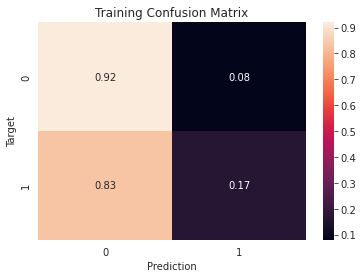

In [94]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 64.00%


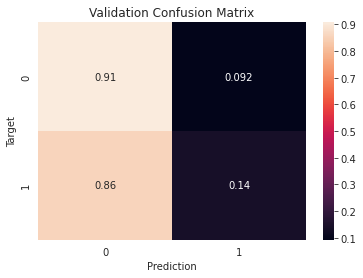

In [96]:
#Let's compute the model's accuracy on the validation and test sets too.
val_preds = predict_and_plot(X_val, val_targets, 'Validation')

Accuracy: 62.00%


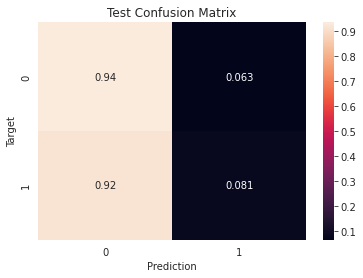

In [103]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')